# Homework 2

## Complex numbers

In [8]:
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

In [9]:
3 + 2j

(3+2j)

In [10]:
a = 3
b = 3
z = a + b* 1j
print ('z = ', z)
print ('The type of the variable is ', type(z))

z =  (3+3j)
The type of the variable is  <class 'complex'>


In [11]:
(2.75 + 3.69j) * (8.55 - 6.13j)

(46.1322+14.692000000000004j)

In [13]:
1.4 * np.exp(5.32j)

(0.79927078585823497-1.1494199453957457j)

In [15]:
(7.51 - 9.15j) / (4.43 + 9.64j) 

(-0.4880897698448308-1.0033441577191493j)

# Shapes created by the Joukowski transformation

In [17]:
def jouk(z,c):
    xi = z + (c**2)/z
    return xi

(1.4998111915108125, -1.4998111915108125)

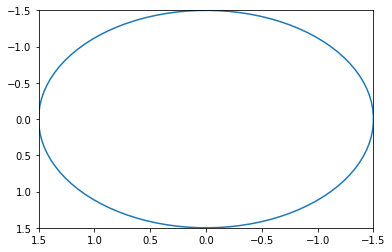

In [21]:
c = 1
r = 1.5
theta  = np.linspace(0, 2 * math.pi,100)
z = r * np.cos(theta) + r * np.sin(theta)* 1j
plt.plot(z.real,z.imag)
plt.xlim(np.max(z.real),np.min(z.real))
plt.ylim(np.max(z.imag),np.min(z.imag))

(0.83322843972822924, -0.83322843972822913)

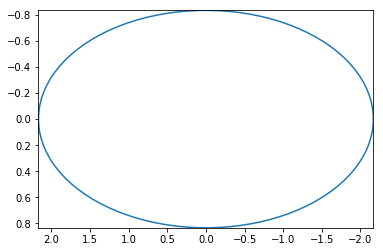

In [22]:
j = jouk(z,c)
plt.plot(j.real,j.imag)
plt.xlim(np.max(j.real),np.min(j.real))
plt.ylim(np.max(j.imag),np.min(j.imag))

In [23]:
r = 1.2
z = r * np.cos(theta) - (c-r) + r * np.sin(theta)* 1j

(1.19984895320865, -1.19984895320865)

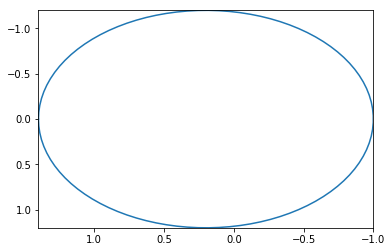

In [24]:
plt.plot(z.real,z.imag)
plt.xlim(np.max(z.real),np.min(z.real))
plt.ylim(np.max(z.imag),np.min(z.imag))

(0.442134232523125, -0.44213423252312511)

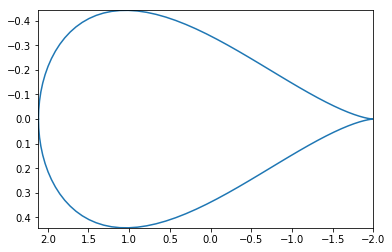

In [25]:
j = jouk(z,c)
plt.plot(j.real,j.imag)
plt.xlim(np.max(j.real),np.min(j.real))
plt.ylim(np.max(j.imag),np.min(j.imag))

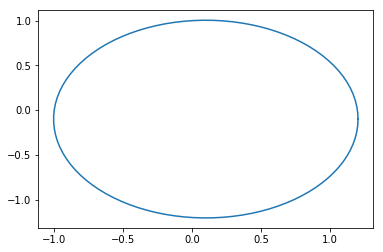

In [27]:
deltax , deltay = -0.1,0.1
r = ((c-deltax)**2+deltay**2)**.5
z = r*np.cos(theta)-(deltax) + (r*np.sin(theta) - deltay)*1j
plt.plot(z.real,z.imag)

(0.13189733493747968, -0.39464379441410813)

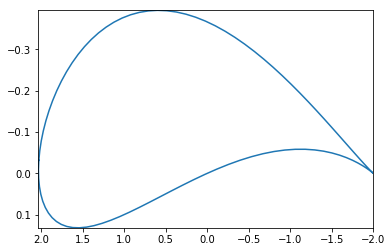

In [28]:
j = jouk(z,c)
plt.plot(j.real,j.imag)
plt.xlim(np.max(j.real),np.min(j.real))
plt.ylim(np.max(j.imag),np.min(j.imag))

## Polar Coordinates

In [30]:
c = 1.0
r = 1.15
deltax , deltay = -0.15,0.0
z = r*np.cos(theta)-(deltax) + (r*np.sin(theta) - deltay)*1j

In [31]:
Nr = 100
Nt = 145
grid_r = np.linspace(r,5,Nr)
grid_theta = np.linspace(0,2*math.pi,Nt)
r_mesh,theta_mesh = np.meshgrid(grid_r,grid_theta)
x_grid = r_mesh*np.cos(theta_mesh) - (r-c)
y_grid = r_mesh*np.sin(theta_mesh)
z_grid = x_grid + y_grid*1j

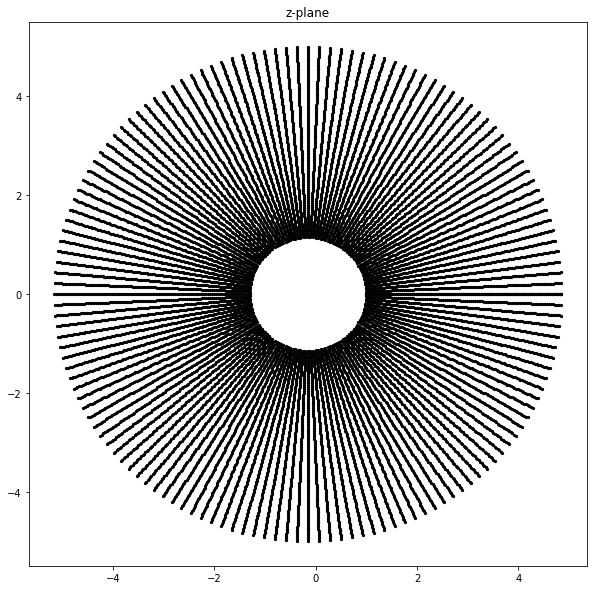

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(z_grid.real,z_grid.imag,color='k', s=5)
plt.title('z-plane')

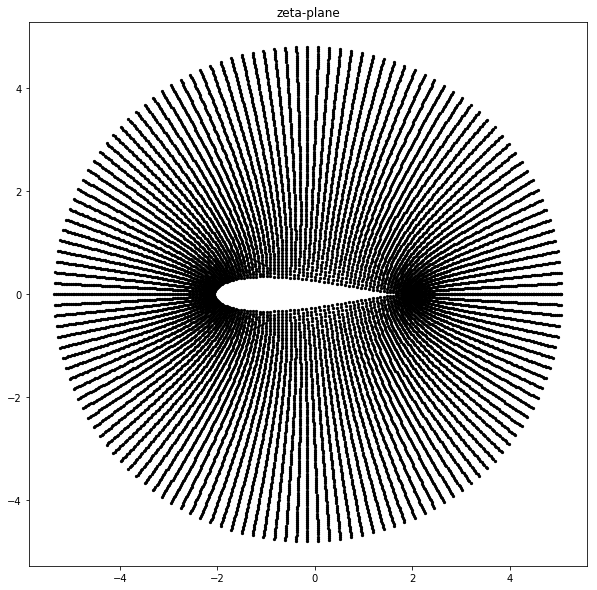

In [33]:
j_grid = jouk(z_grid,c)
plt.figure(figsize=(10,10))
plt.scatter(j_grid.real,j_grid.imag,color='k', s=5)
plt.title('zeta-plane')

## Flow over a symmetric Joukowski airfoil

In [34]:
u_inf = 1.0
u_freestream = u_inf*np.ones((Nt, Nr), dtype=float)
v_freestream = np.zeros((Nt, Nr), dtype=float)
psi_freestream = u_inf*y_grid

In [40]:
def vel_doub(sigma, xd, yd, X, Y):
    """
    Returns the velocity field generated by a doublet.
    
    Parameters
    ----------
    sigma: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = (- sigma / (2 * math.pi) * ((X - xd)**2 - (Y - yd)**2) / ((X - xd)**2 + (Y - yd)**2)**2)
    v = (- sigma / (2 * math.pi) * 2 * (X - xd) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)**2)
    
    return u, v

def stream_doub(sigma, xd, yd, X, Y):
    """
    Returns the stream-function generated by a doublet.
    
    Parameters
    ----------
    sigma: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = - sigma / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    
    return psi

In [41]:
x_doublet = deltax
y_doublet = deltay
sigma = (r**2)*2*math.pi*u_inf
print('Strength = ', sigma)

Strength =  8.309512568745001


In [43]:
u_doub, v_doub = vel_doub(sigma,x_doublet,y_doublet,x_grid,y_grid)
psi_doub = stream_doub(sigma,x_doublet,y_doublet,x_grid,y_grid)

u = u_doub + u_freestream
v = v_doub + v_freestream
psi = psi_doub + psi_freestream

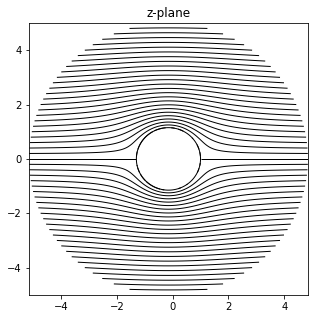

In [47]:
plt.figure(figsize=(5,5))
plt.contour(x_grid,y_grid,psi,levels=np.linspace(np.min(psi),np.max(psi),51), colors='k', linewidths=1, 
            linestyles='solid')
plt.plot(r*np.cos(theta)-(r-c),r*np.sin(theta), color ='k',linewidth = 1)
plt.title('z-plane')